In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from IPython.display import HTML
from scipy.special import inv_boxcox
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
country_wise_latest_dataset = pd.read_csv("1. country_wise_latest.csv")

In [3]:
attr_obj = country_wise_latest_dataset.shape
print(f"Numri i atributeve në dataset është: {attr_obj[1]}")
print(f"Numri i objekteve në dataset është: {attr_obj[0]}")

Numri i atributeve në dataset është: 15
Numri i objekteve në dataset është: 187


In [4]:
country_wise_latest_dataset.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [5]:
def num_missing(x):
  return sum(x.isnull())

In [6]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(country_wise_latest_dataset.apply(num_missing, axis=0)) #axis=0 nenkupton qe funksionoi num_missing do te aplikohet ne cdo kolone

Numri i vlerave që mungojnë në çdo kolonë:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [7]:
dups = country_wise_latest_dataset.duplicated()
print('Numri i rreshtave të përsëritur = %d' % (dups.sum()))

Numri i rreshtave të përsëritur = 0


In [8]:
x = country_wise_latest_dataset['WHO Region']
y = country_wise_latest_dataset['New recovered']

Text(0, 0.5, 'Recovered')

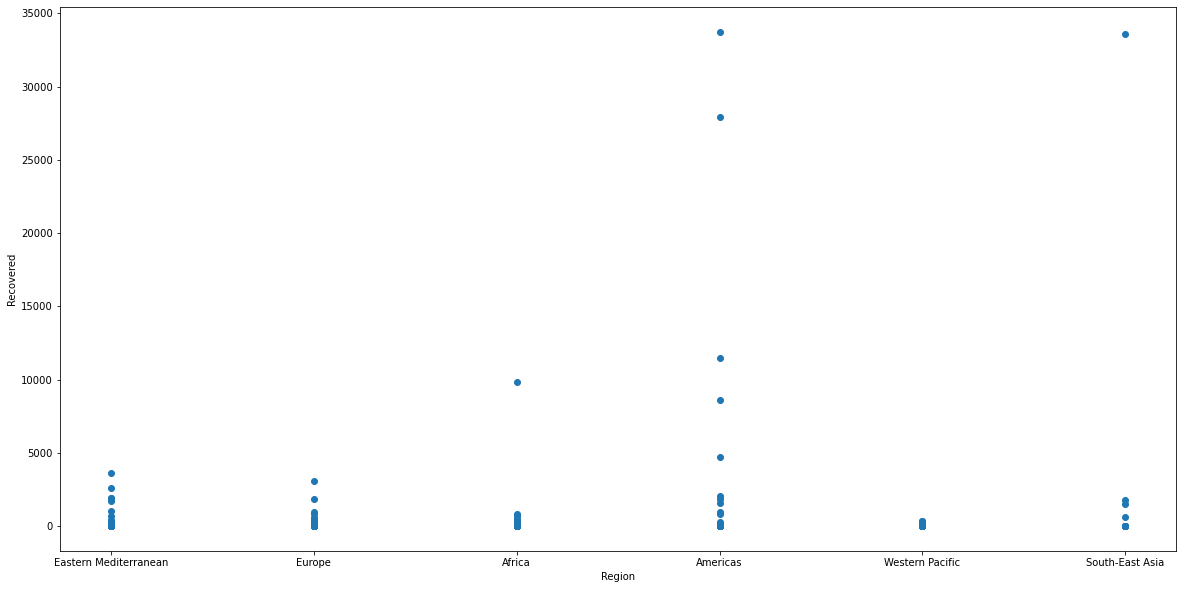

In [11]:
plt.scatter(x,y)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Region')
plt.ylabel('Recovered')

In [12]:
columns_list = ['New cases']

In [13]:
#split dataset in features and target variable
X = country_wise_latest_dataset[columns_list] # Features
# y = country_wise_latest_dataset.Deaths # Target variable
y = country_wise_latest_dataset['New deaths']

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [16]:
scores = cross_val_score(clf, X, y, cv=5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [17]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.48 accuracy with a standard deviation of 0.01


In [18]:
# Create Decision Tree classifer object
clf_decission_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_decission_tree = clf_decission_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_decission_tree_clf = clf_decission_tree.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decission_tree_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_decission_tree_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_decission_tree_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_decission_tree_clf))

Accuracy: 0.5263157894736842
Mean Absolute Error: 10.771929824561404
Correct Score: 0.5263157894736842
Kappa Score: 0.2858468677494198


In [20]:
clf_decission_tree_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_decission_tree_clf)
clf_decission_tree_confusion_matrix

array([[27,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [21]:
#Create a Random Forest Classifier
clf_random_forest = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_random_forest.fit(X_train,y_train)

y_pred_random_forest_clf = clf_random_forest.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_random_forest_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_random_forest_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_random_forest_clf))

Accuracy: 0.5263157894736842
Mean Absolute Error: 10.771929824561404
Correct Score: 0.5263157894736842
Kappa Score: 0.2858468677494198


In [23]:
clf_random_forest_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_random_forest_clf)
clf_random_forest_confusion_matrix

array([[27,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [24]:
# Create a Gaussian Classifier
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)
y_pred_gaussian_clf = clf_gaussian.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gaussian_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_gaussian_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_gaussian_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_gaussian_clf))

Accuracy: 0.543859649122807
Mean Absolute Error: 5.9298245614035086
Correct Score: 0.543859649122807
Kappa Score: 0.24885960466294976


In [26]:
clf_gaussian_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gaussian_clf)
clf_gaussian_confusion_matrix

array([[31,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0],
       [ 4,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

In [328]:
#split dataset in features and target variable
columns_list = ['Deaths / 100 Cases', 'Deaths / 100 Recovered', 'Recovered / 100 Cases']
X = country_wise_latest_dataset[columns_list] # Features
# y = country_wise_latest_dataset.Deaths # Target variable
y = country_wise_latest_dataset['Recovered / 100 Cases']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [329]:
country_value = pd.DataFrame(country_wise_latest_dataset['Recovered / 100 Cases'])
country_value = country_value.reset_index()

for index, row in country_value.iterrows():
    if row['Recovered / 100 Cases'] == 0:
        country_value = country_value.drop(country_value.index[index])


boxcox_target = stats.boxcox(country_value['Recovered / 100 Cases'])
box_cox_param = boxcox_target[1]


background_color='#fbfbfb'

In [330]:
# Function for providing generalized results for regression model
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. regression model eg: LinearRegression(),LassoRegression() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name=model.__class__.__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training score: {train_score}\nTesting score: {test_score}")
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    df=pd.DataFrame({"Actual": y_test,
                     "Predicted":y_pred})
    
    #Apply inverse box cox to retrieve original target results
    df=inv_boxcox(df,box_cox_param)
    
    #Finding the difference between original and predicted
    df["difference"]=df.Predicted-df.Actual
    df.reset_index(inplace=True)
    
    #Plot actual vs predicted
    plt.figure(figsize=(10,5));
    sns.scatterplot(data=df,x="index",y="Actual",color='grey',label=["Actual"]).set_facecolor(background_color);
    sns.lineplot(data=df,x="index",y="Predicted",color='salmon',label=["Predicted"]);
    plt.legend(loc="right",bbox_to_anchor=(1.1,1));
    plt.title(model_name+" -Actual vs Predicted");
    plt.show()
    
    print ("Sample comparison file for actual and predicted target feature:")
    display(df.head())
    
    # Return the model for re-use if required.
    return model

In [331]:
#General data frame and function for storing and comparing model results.
df_model_results=pd.DataFrame(columns=["ModelName","TrainScore"])

def store_model_results(modl_name,train_score):
    global df_model_results
    row_loc=df_model_results.shape[0]+1
    df_model_results.loc[row_loc,["ModelName","TrainScore"]]=[modl_name,train_score]

In [332]:
def show_model_scores(x,y):
    global df_model_results
    df_model_results=df_model_results.iloc[0:0] #reset display dataframe
    for model in  [LinearRegression(),
                   Lasso(),
                   Ridge(),
                   ElasticNet()]:
        store_model_results(model.__class__.__name__, cross_val_score(model,x,y,cv=3).mean())
    df_model_results.sort_values("TrainScore",ascending=False,inplace=True)
    display(df_model_results)
    display(HTML('Selected model : <b>' + df_model_results.head(1)['ModelName'].values[0] + '</b>'))

In [333]:
# X_train, X_test, y_train, y_test
show_model_scores(X_train,y_train)

,ModelName,TrainScore
1,LinearRegression,1.0
3,Ridge,1.0
4,ElasticNet,0.999997
2,Lasso,0.999997


Training score: 1.0
Testing score: 1.0
Prediction completed.


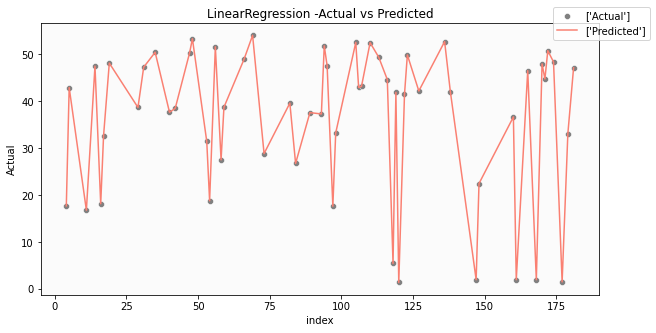

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,16,18.126126,18.126126,2.486900e-14
1,172,50.784035,50.784035,-2.131628e-14
2,127,42.186606,42.186606,0.000000e+00
3,40,37.654404,37.654404,0.000000e+00
4,106,42.930627,42.930627,0.000000e+00


LinearRegression()

In [334]:
evaluate_model(LinearRegression(),X_train,y_train,X_test,y_test)

Training score: 0.9999999997902194
Testing score: 0.9999989016333759
Prediction completed.


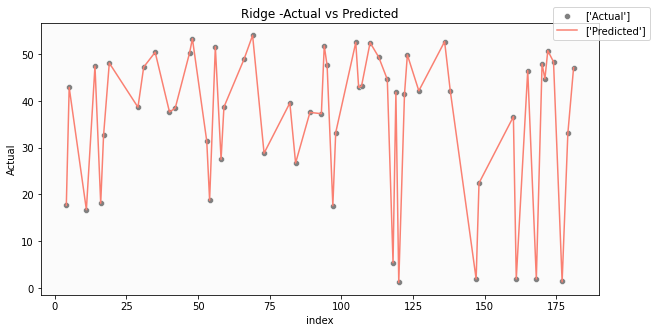

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,16,18.126126,18.125548,-0.000578
1,172,50.784035,50.783865,-0.000170
2,127,42.186606,42.186582,-0.000024
3,40,37.654404,37.654414,0.000010
4,106,42.930627,42.930591,-0.000036


Ridge()

In [335]:
evaluate_model(Ridge(),X_train,y_train,X_test,y_test)

Training score: 0.9999971833023037
Testing score: 0.99999717469878
Prediction completed.


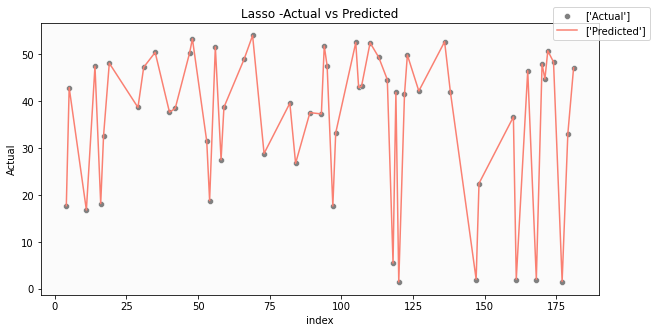

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,16,18.126126,18.162601,0.036476
1,172,50.784035,50.763304,-0.020731
2,127,42.186606,42.179795,-0.006811
3,40,37.654404,37.655130,0.000727
4,106,42.930627,42.922593,-0.008034


Lasso()

In [336]:
evaluate_model(Lasso(),X_train,y_train,X_test,y_test)

Training score: 0.9999971880236295
Testing score: 0.9999971794345269
Prediction completed.


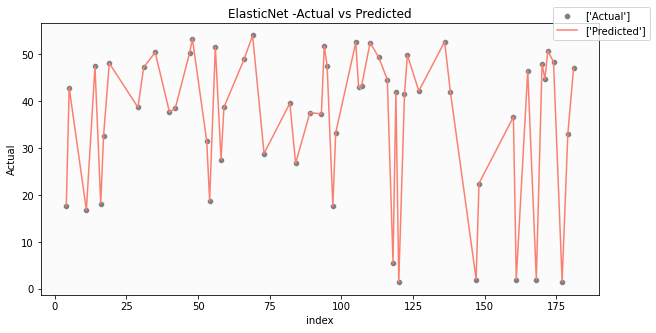

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,16,18.126126,18.162571,0.036445
1,172,50.784035,50.763321,-0.020713
2,127,42.186606,42.179801,-0.006806
3,40,37.654404,37.655130,0.000726
4,106,42.930627,42.922600,-0.008027


ElasticNet()

In [337]:
evaluate_model(ElasticNet(),X_train,y_train,X_test,y_test)